In [1]:
import os
import sys
import time
import numpy as np

from liblibra_core import *
from libra_py.workflows.nbra import mapping2
from libra_py import data_conv, data_outs, data_stat, units

<frozen importlib._bootstrap>:228: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:228: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, false> > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:228: RuntimeWarning: to-Python converter for std::vector<std::vector<float, std::allocator<float> >, std::allocator<std::vector<float, std::allocator<float> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:228: RuntimeWar

In [2]:
import os
import glob
import h5py
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from libra_py import units
import libra_py
import libra_py.data_visualize





<IPython.core.display.Javascript object>


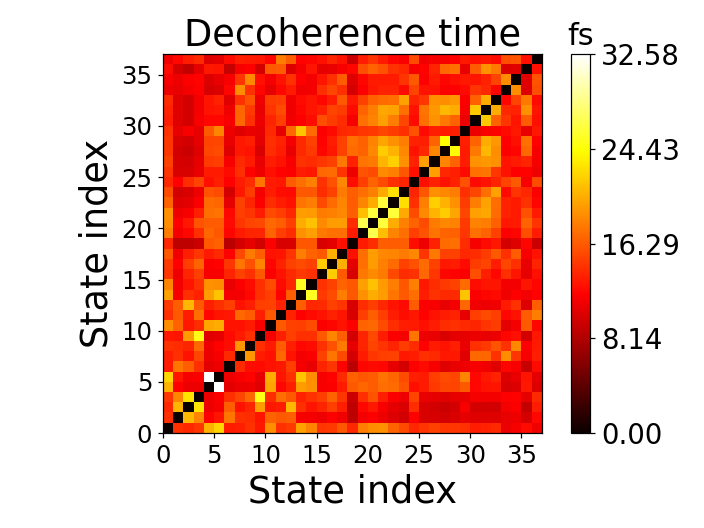

In [3]:
%matplotlib notebook

plt.figure()
avg_deco = np.loadtxt('avg_deco.txt')
nstates = avg_deco.shape[0]
plt.imshow(np.flipud(avg_deco), cmap='hot', extent=(0, nstates, 0, nstates))  # , vmin=0, vmax=100)

plt.xlabel('State index', fontsize=24)
plt.ylabel('State index', fontsize=24)
colorbar = plt.colorbar()
colorbar.ax.set_title('fs',fontsize=20)


existing_ticks = colorbar.get_ticks()


max_value = np.max(avg_deco)


new_ticks = np.linspace(existing_ticks[0], max_value, 5)


colorbar.ax.tick_params(labelsize=18)
colorbar.set_ticks(new_ticks)


tick_labels = [f'{tick:.2f}' for tick in new_ticks]
colorbar.set_ticklabels(tick_labels)

plt.xticks(fontsize=16)

plt.yticks(fontsize=16)
plt.title(F'Decoherence time',fontsize = 24)
plt.tight_layout()
plt.savefig('decoherence_time_plot_211.png')


plt.show()

<IPython.core.display.Javascript object>


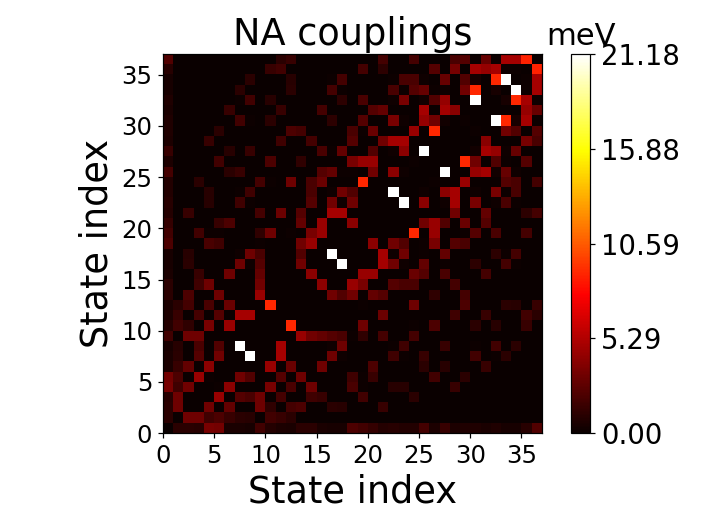

In [4]:
%matplotlib notebook

plt.figure()


desired_file_count = 1722 
nac = np.zeros((37, 37))
files = glob.glob('SD_basis_1/Hvib*im*')

file_count = 0

for file in files:
    if file_count >= desired_file_count:
        break  

    tmp = np.loadtxt(file)
    nac += (np.abs(tmp) * 1000 * 27.211385)
    file_count += 1

nac /= file_count
max_value = np.max(nac)


img = plt.imshow(np.flipud(nac), cmap='hot', extent=(0, 37, 0, 37))


plt.clim(0, max_value)

plt.xlabel('State index', fontsize=24)
plt.ylabel('State index', fontsize=24 )
colorbar = plt.colorbar()
colorbar.ax.set_title('meV',fontsize = 20)

ticks = [0, max_value, 0.25 * max_value, 0.5 * max_value, 0.75 * max_value]
colorbar.set_ticks(ticks)

colorbar.ax.tick_params(labelsize=18)
colorbar.set_ticks(ticks)

tick_labels = [f'{tick:.2f}' for tick in ticks]
colorbar.set_ticklabels(tick_labels)
plt.xticks(fontsize=16)

plt.yticks(fontsize=16)

plt.title(F'NA couplings', fontsize=24)

plt.tight_layout()
plt.savefig('frag_1_nac211.png', dpi=600)


(1721, 12)


<IPython.core.display.Javascript object>


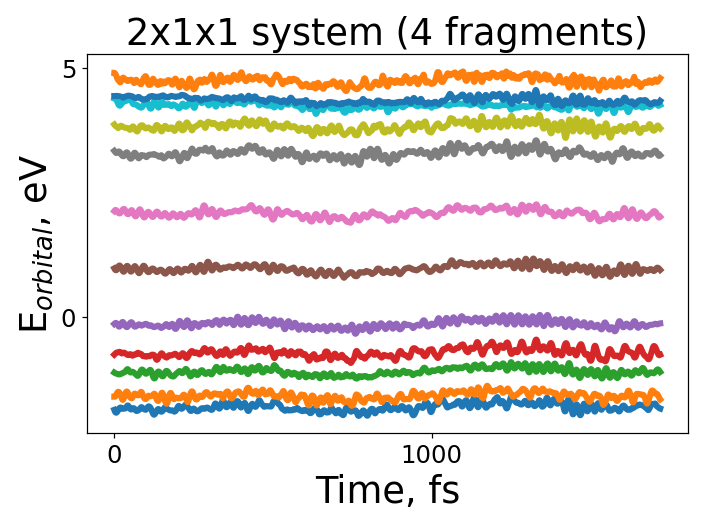

In [14]:
istep = 1  
fstep = 1722 

E = []
for step in range(istep, fstep):
    energy_filename = F"NAD/E_{step}_0_1_re"

    energy_mat = np.loadtxt(energy_filename)

    E.append(np.array(energy_mat))
E = np.array(E)

plt.set_cmap('gray')

%matplotlib notebook
print(E.shape)
md_time = np.arange(0, E.shape[0])

array2d = np.arange(0, 1721)

for i in range(E.shape[1]):
    linewidth = 4 
    plt.plot(array2d, E[:, i] * units.au2ev, linewidth=linewidth)

plt.xlabel('Time, fs', fontsize=24)
plt.ylabel('E$_{orbital}$, eV', fontsize=24)
plt.title(F'2x1x1 system (4 fragments)', fontsize=24)
plt.xticks(fontsize=16)

plt.yticks(fontsize=16)

plt.tight_layout()
plt.savefig('energy_211_test.png', dpi=600)

<IPython.core.display.Javascript object>


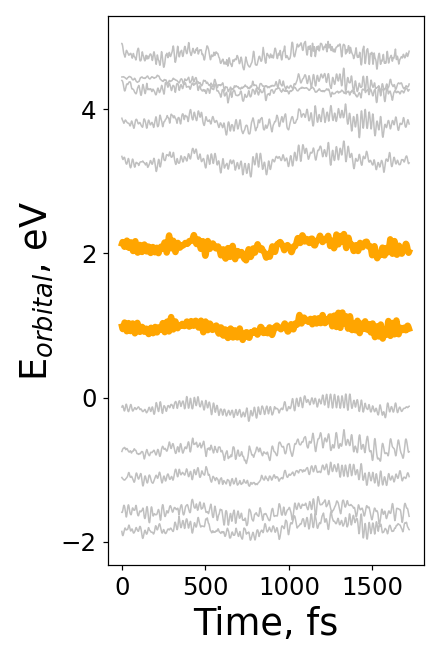

<IPython.core.display.Javascript object>


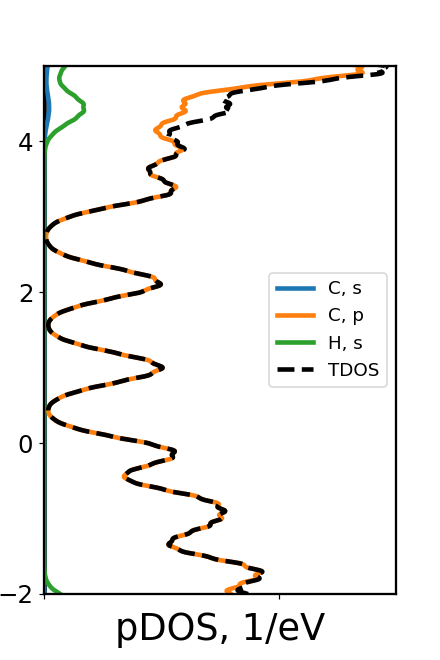

In [15]:
istep = 1   # the first timestep to read
fstep = 1722 # the last timestep to read

# ================== Read energies =====================
E = []
for step in range(istep, fstep):
    energy_filename = F"NAD/E_{step}_0_1_re"
    energy_mat = np.loadtxt(energy_filename)
    E.append(np.array(energy_mat))
E = np.array(E)

plt.set_cmap('gray')

%matplotlib notebook
#print(E.shape)
md_time = np.arange(0, E.shape[0])


array2d = np.arange(0, 1721)

plt.figure(figsize=(4, 6))  

for i in range(E.shape[1]):
    linewidth = 4 if i == 5 or i == 6 else 1 
    color = 'orange' if i == 5 or i == 6 else 'silver' 
    plt.plot(array2d, E[:, i] * units.au2ev, linewidth=linewidth, color=color)

plt.xlabel('Time, fs', fontsize=24)
plt.ylabel('E$_{orbital}$, eV', fontsize=24)

plt.xticks(fontsize=16)

plt.yticks(fontsize=16)
plt.xticks(np.arange(0, 1723, 500))

plt.tight_layout()
plt.savefig('energy_211_test.png', dpi=600)


def gaussian_function(a, mu, sigma, num_points, x_min, x_max):
    pre_fact = (a/sigma)/(np.sqrt(2*np.pi))
    x = np.linspace(x_min, x_max, num_points)
    x_input = np.array((-1/2)/(np.square(sigma))*np.square(x-mu))
    gaussian_fun = pre_fact*np.exp(x_input)

    return x, gaussian_fun

def gaussian_function_vector(a_vec, mu_vec, sigma, num_points, x_min, x_max):
    for i in range(len(a_vec)):
        if i==0:
            sum_vec = np.zeros(num_points)
        energy_grid, conv_vec = gaussian_function(a_vec[i], mu_vec[i], sigma, num_points, x_min, x_max)
        sum_vec += conv_vec
    return energy_grid, sum_vec
import numpy as np
import glob
import matplotlib.pyplot as plt


plt.rc('axes', titlesize=36)      
plt.rc('axes', labelsize=36)     
plt.rc('legend', fontsize=12)     
plt.rc('xtick', labelsize=36)     
plt.rc('ytick', labelsize=36)     

sigma = 0.05
num_points = 5000
x_min = -10
x_max = 10
ang_moms = ['s', 'p']
atoms = ['C', 'H']

total_density = np.zeros((num_points))

fig = plt.figure(figsize=(4, 6))


ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 

for atom in atoms:
    atom_density = np.zeros(total_density.shape)
    for ang_mom in ang_moms:
        ang_density = np.zeros(total_density.shape)
        files = glob.glob(F'/vscratch/grp-alexeyak/qingxin/eQE/2x1x1/output/fdos*{atom}*({ang_mom})*')
        try:
            for file in files:
                x = np.loadtxt(file)
                grid, conv_pdos = gaussian_function_vector(x[:,1], x[:,0], sigma, num_points, x_min, x_max)
                ang_density += conv_pdos
            atom_density += ang_density
            if not np.all(ang_density == 0):
                ax.plot(ang_density, grid, label=F'{atom}, {ang_mom}', lw=3)
        except:
            pass
    total_density += atom_density

ax.plot(total_density, grid, label='TDOS', color='black', ls='--', lw=3)

ax.axvline(x=0, color='black', linestyle='-', zorder=1, lw=3)  

ax.legend(loc='center right')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_xlim(0, 300)
ax.set_ylim(-2, 5)

ax.set_xlabel('pDOS, 1/eV', fontsize=24)
ax.set_xticklabels([])

for spine in ax.spines.values():
    spine.set_linewidth(1.5) 

plt.savefig('Orbital_solved_DOS.jpg', dpi=600, bbox_inches='tight', edgecolor='black') 
plt.show()


<IPython.core.display.Javascript object>


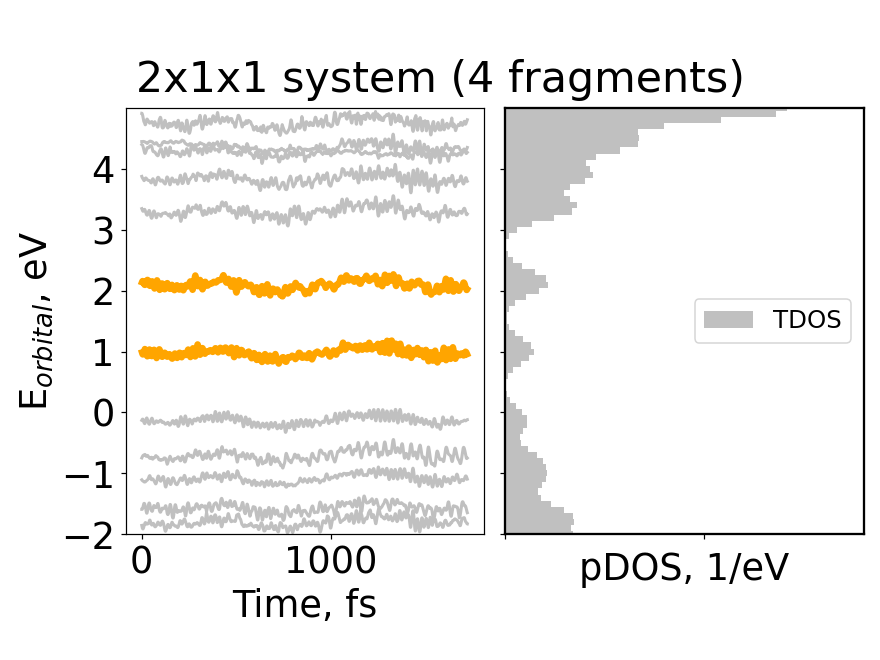

In [12]:
def plot_second(ax):
    sigma = 0.00095
    num_points = 5000
    x_min = -10
    x_max = 10
    atoms = ['C', 'H']
    total_density = np.zeros((num_points))

    for atom in atoms:
        atom_density = np.zeros(total_density.shape)
        files = glob.glob(F'/vscratch/grp-alexeyak/qingxin/eQE/2x1x1/output/fdos*{atom}*')
        try:
            for file in files:
                x = np.loadtxt(file)
                grid, conv_pdos = gaussian_function_vector(x[:,1], x[:,0], sigma, num_points, x_min, x_max)
                atom_density += conv_pdos
        except:
            pass
        total_density += atom_density

    ax.barh(grid, total_density, color='silver', height=0.1, align='center', label='TDOS')
    ax.axvline(x=0, color='black', linestyle='-', zorder=1, lw=0.1)
    ax.set_ylim(-2, 5)
    ax.set_xlim(0, 9000)
    ax.set_xlabel('pDOS, 1/eV', fontsize=24)
    ax.set_xticklabels([])
    ax.set_yticks(np.arange(-2, 5, 1))  
    ax.tick_params(axis='both', which='major', labelsize=24)  

    for spine in ax.spines.values():
        spine.set_linewidth(1.5)

    max_density_index = np.argmax(total_density)
   
    ax.legend(fontsize=16, loc='center right')  

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharey=True)  

istep = 1  
fstep = 1722 


E = []
for step in range(istep, fstep):
    energy_filename = F"NAD/E_{step}_0_1_re"
    energy_mat = np.loadtxt(energy_filename)
    E.append(np.array(energy_mat))
E = np.array(E)

array2d = np.arange(0, 1721)

for i in range(E.shape[1]):
    linewidth = 4 if i == 5 or i == 6 else 2
    color = 'orange' if i == 5 or i == 6 else 'silver'
    ax1.plot(array2d, E[:, i] * units.au2ev, linewidth=linewidth, color=color)

ax1.set_xlabel('Time, fs', fontsize=24)
ax1.set_ylabel('E$_{orbital}$, eV', fontsize=24)
ax1.set_xticks(np.arange(0, 1723, 1000))
ax1.tick_params(axis='both', which='major', labelsize=24)
ax1.tick_params(axis='both', which='minor', labelsize=24)
ax1.set_ylim(-2, 5)  # Set y-axis limit from -2 to 5
ax1.tick_params(axis='y', labelsize=24)  # Set tick font size

plot_second(ax2)

plt.suptitle('2x1x1 system (4 fragments)', fontsize=28, y=0.91)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('combined_plots211_with_legend.png', dpi=600)
plt.show()


(1721, 37)


<IPython.core.display.Javascript object>


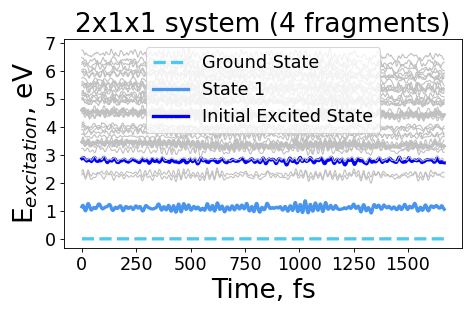

In [19]:
istep = 1   
fstep = 1722 

E = []
for step in range(istep, fstep):
    energy_filename = F"SD_basis_1/Hvib_sd_{step}_re"
    energy_mat = np.loadtxt(energy_filename)
    E.append(np.array(np.diag(energy_mat)))
E = np.array(E)

plt.set_cmap('gray')

%matplotlib notebook
print(E.shape)
md_time = np.arange(0, E.shape[0])

line_colors = ['green', 'red', 'orange', 'purple', 'cyan', 'magenta']


lines = []
labels = []
for i in range(E.shape[1]):
    linewidth = 3 if i in [0, 1, 4, 8, 17] else 1 
    linestyle = '--' if i == 0 else '-'  
    color = None  
    label = None  
    if i == 0: 
        color = '#4cc9f0'
        label = 'Ground State'
    elif i == 1:  
        color = '#4895ef'
        label = 'State 1'
    elif i == 4: 
        color = 'blue'
        label = 'Initial Excited State'
  
    else:  
        color = 'silver'
        label = 'Other'
    line, = plt.plot(md_time * 40 / 41.3, E[:, i] * units.au2ev, linewidth=linewidth, linestyle=linestyle, color=color)
    if color != 'silver':
        lines.append(line)
        labels.append(label)


plt.legend(handles=lines, labels=labels, loc='upper center', fontsize=16,ncol=1)

plt.xlabel('Time, fs', fontsize=24)
plt.ylabel('E$_{excitation}$, eV', fontsize=24)
plt.title(F'2x1x1 system (4 fragments)', fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(np.arange(0, md_time[-1]*40/41.3+1, 250), fontsize=16)

plt.yticks(np.arange(0, 8, 1), fontsize=16)  
plt.tight_layout()
plt.savefig('energy_level——211.png', dpi=600)  



GFSH_new66_icond_1/mem_data.hdf
GFSH_new66_icond_201/mem_data.hdf
GFSH_new66_icond_401/mem_data.hdf
GFSH_new66_icond_601/mem_data.hdf
GFSH_new66_icond_801/mem_data.hdf
GFSH_new66_icond_1001/mem_data.hdf
The timescales for method GFSH: 2266.209567492526+-430.4015178518327 fs, averaged over 4 samples
FSSH_new66_icond_1/mem_data.hdf
FSSH_new66_icond_201/mem_data.hdf
FSSH_new66_icond_401/mem_data.hdf
FSSH_new66_icond_601/mem_data.hdf
FSSH_new66_icond_801/mem_data.hdf
FSSH_new66_icond_1001/mem_data.hdf
The timescales for method FSSH: 1435.4245132501696+-270.98765678948587 fs, averaged over 5 samples
MSDM_new66_icond_1/mem_data.hdf
MSDM_new66_icond_201/mem_data.hdf
MSDM_new66_icond_401/mem_data.hdf
MSDM_new66_icond_601/mem_data.hdf
MSDM_new66_icond_801/mem_data.hdf
MSDM_new66_icond_1001/mem_data.hdf
The timescales for method MSDM: 7953.100719444207+-1787.9492915373319 fs, averaged over 6 samples
IDA_new66_icond_1/mem_data.hdf
IDA_new66_icond_201/mem_data.hdf
IDA_new66_icond_401/mem_data.hdf


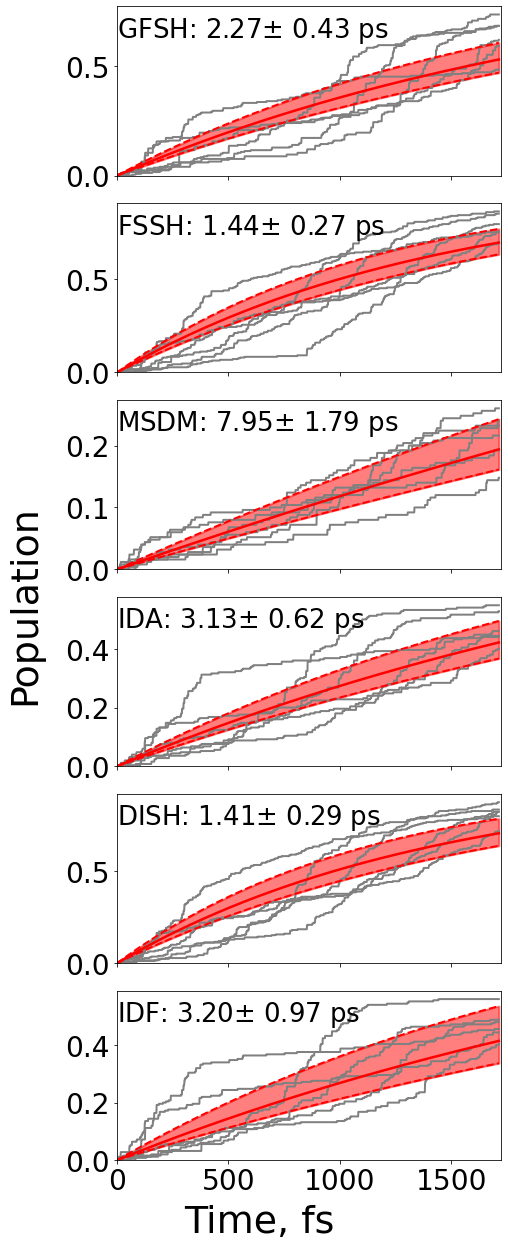

In [16]:
%matplotlib inline

from scipy.optimize import curve_fit

def exp_func(x, a):
    return 1 - np.exp(-x / a)

def squared_exp_func(x, a):
    return 1 - np.exp(-x**2 / a**2)

fig, ax = plt.subplots(6, 1, figsize=(7, 18), sharex=True)

rainbow_colors = ['red', 'red', 'red', 'red', 'red', 'red', 'red']

method_functions = {
    'GFSH': exp_func,
    'FSSH': exp_func,
    'MSDM': exp_func,
    'MASH': exp_func,
    'DISH': exp_func,
    'IDA': exp_func,
    'IDF': exp_func,
}

for c, method in enumerate(['GFSH', 'FSSH', 'MSDM', 'IDA', 'DISH', 'IDF']):
    taus = []
    
    for icond in range(1, 1002, 200):
        print(F'{method}_new66_icond_{icond}/mem_data.hdf')
        with h5py.File(F'{method}_new66_icond_{icond}/mem_data.hdf', 'r') as F:
            sh_pop = np.array(F['sh_pop_adi/data'][:, 0])
            md_time = np.array(F['time/data'][:]) * units.au2fs

        ax[c].plot(md_time, sh_pop, color='gray', linewidth=2.0)

        fit_function = method_functions[method]
        popt, pcov = curve_fit(fit_function, md_time, sh_pop, bounds=([0.0], [np.inf]))
        tau = popt
        residuals = sh_pop - fit_function(md_time, *popt)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((sh_pop - np.mean(sh_pop))**2)
        r_squared = 1.0 - (ss_res / ss_tot)

        if r_squared > 0.8:
            taus.append(tau)

    taus = np.array(taus)
    ave_tau = np.average(taus)
    s = np.std(taus)
    Z = 1.96
    N = taus.shape[0]
    error_bar = Z * s / np.sqrt(N) 
 
    clr = rainbow_colors[c % len(rainbow_colors)]
    
    print(F'The timescales for method {method}: {ave_tau}+-{error_bar} fs, averaged over {len(taus)} samples')

    ax[c].plot(md_time, fit_function(md_time, ave_tau - error_bar), ls='--', color=clr, linewidth=2.0)
    ax[c].plot(md_time, fit_function(md_time, ave_tau), ls='-', color=clr, label=F"{method}", linewidth=2.5)
    ax[c].plot(md_time, fit_function(md_time, ave_tau + error_bar), ls='--', color=clr, linewidth=2.0)
    ax[c].fill_between(md_time, fit_function(md_time, ave_tau - error_bar), fit_function(md_time, ave_tau + error_bar), color='red', alpha=0.5, linewidth=2.0)

    
    ax[c].text(0, 0.95, f'{method}: {ave_tau / 1000:.2f}$\\pm$ {error_bar / 1000:.2f} ps', transform=ax[c].transAxes, fontsize=26, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='red', alpha=0.0, pad=-0.05))

    
    
    ax[c].tick_params(axis='x', labelsize=28)
    ax[c].tick_params(axis='y', labelsize=28)
    ax[c].set_xlim(left=0)
    ax[c].set_ylim(bottom=0)

fig.supylabel('Population', fontsize=38, y=0.5, x=-0.001)
fig.supxlabel('Time, fs', fontsize=38, x=0.5)

plt.subplots_adjust(hspace=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.97])

plt.xlim(0, 1722)

plt.savefig('211_population_recovery.png', dpi=600)
plt.show()

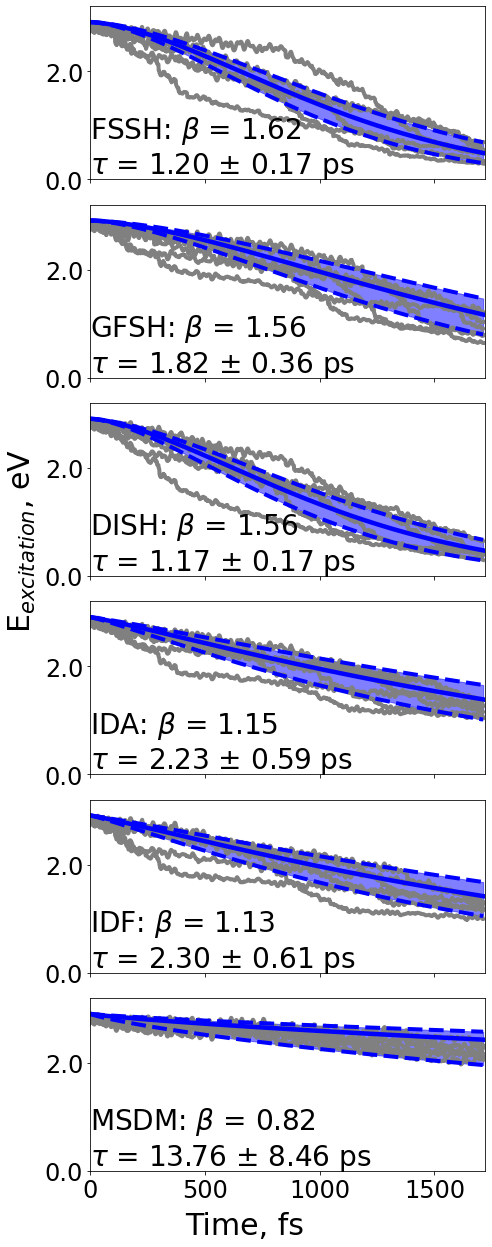

In [26]:
def exp_func_2(x, A, tau, beta):
    return A * np.exp(-np.power(x / tau, beta))
A = 2.91
%matplotlib inline

fig, axs = plt.subplots(6, 1, figsize=(7, 18), sharex=True)

fitted_parameters = []
confidence_intervals = []  
for c, method in enumerate(['FSSH','GFSH','DISH','IDA', 'IDF','MSDM']):
    taus = []
    As = []
    betas = []
    ax = axs[c]

    for icond in range(1, 1002, 200):
        F = h5py.File(f'{method}_new66_icond_{icond}/mem_data.hdf')
        sh_pop = np.array(F['sh_pop_adi/data'])
        start = icond
        end = icond + sh_pop.shape[0]

        if end < E.shape[0]:
            indices = list(range(start, end))
        else:
            indices = list(range(start, E.shape[0]))
            remaining_steps = sh_pop.shape[0] - len(indices)
            indices += list(range(0, remaining_steps))

        energy_matrix = np.multiply(sh_pop[:, :], E[indices, :] * units.au2ev)
        excess_energy = np.sum(energy_matrix, axis=1)
        md_time = np.array(F['time/data'][:]) * units.au2fs

        ax.plot(md_time, excess_energy, color='gray', linewidth=4)

        popt, pcov = curve_fit(exp_func_2, md_time, excess_energy, bounds=([A-0.000001, 0.0, 0.5],[A+0.000001, np.inf, 4.0]))
        tau_fit = popt[1]
        taus.append(tau_fit)
        As.append(A)
        beta = popt[2]
        betas.append(beta)
     
    ax.set_ylim(0, 3.2, 0.5)
    ax.set_xlim(0, 1722)
    ax.tick_params(axis='x', labelsize=24)
    ax.tick_params(axis='y', labelsize=24)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

    taus = np.array(taus)
    As = np.array(As)
    ave_tau = np.average(taus)
    ave_A = np.average(As)
    ave_beta = np.average(betas)
    s_tau = np.std(taus)
    s_A = np.std(As)
    Z = 1.96
    N = taus.shape[0]
    error_bar_tau = Z * s_tau / np.sqrt(N)
    error_bar_A = Z * s_A / np.sqrt(N)
    fitted_parameters.append((ave_A, ave_tau))
    confidence_intervals.append((error_bar_A, error_bar_tau))
    ave_tau_ps = ave_tau / 1000 
    error_bar_tau_ps = error_bar_tau / 1000 
      
    ave_beta = np.average(betas)
 
    label_with_tau_beta = f'{method}: $\\beta$ = {ave_beta:.2f}\n$\\tau$ = {ave_tau_ps:.2f} $\\pm$ {error_bar_tau_ps:.2f} ps '
    
    ax.set_title(label_with_tau_beta, fontsize=28, loc='left', y=0.)
    
    
    ax.plot(md_time, exp_func_2(md_time, ave_A, ave_tau - error_bar_tau, ave_beta), ls='--', color='blue', label=f'Method: {method}', linewidth=4)
    ax.plot(md_time, exp_func_2(md_time, ave_A, ave_tau, ave_beta), ls='-', color='blue', label=f'Method: {method}', linewidth=4.5)
    ax.plot(md_time, exp_func_2(md_time, ave_A, ave_tau + error_bar_tau, ave_beta), ls='--', color='blue', label=f'Method: {method}', linewidth=4)
    ax.fill_between(md_time, exp_func_2(md_time, ave_A - error_bar_A, ave_tau - error_bar_tau, ave_beta), exp_func_2(md_time, ave_A + error_bar_A, ave_tau + error_bar_tau, ave_beta), color='blue', alpha=0.5)
       
    ave_beta = np.average(betas)
   
     
   


fig.supylabel('E$_{excitation}$, eV', fontsize=30, y=0.55, x=0.03)

fig.supxlabel('Time, fs', fontsize=30, x=0.5)

plt.subplots_adjust(hspace=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.97])

plt.xticks(np.arange(0, 1723, 500))

plt.savefig('211_excitition_energy_decay.png', dpi=500)
plt.show()